In [1]:
!git clone https://github.com/AshishJangra27/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 359, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 359 (delta 28), reused 54 (delta 9), pack-reused 235 (from 1)
Receiving objects: 100% (359/359), 283.76 MiB | 15.21 MiB/s, done.
Resolving deltas: 100% (154/154), done.
Updating files: 100% (233/233), done.


# Agenda | Top 10 Airbnbs of Manali under 5000

1. Rating
2. Amenities
3. Reviews

### 1. Exploratory Data Analysis

In [2]:
import pandas as pd

data = pd.read_csv('/content/datasets/Airbnb/airbnb_v2.csv')
data.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


#### 1.1) Checking basic detials

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

#### 1.2) Check null values

In [4]:
data.isnull().sum()

,0
Unnamed: 0,0
id,0
name,0
rating,0
reviews,0
host_name,8
host_id,0
address,0
features,0
amenities,0


#### 1.3) Check Duplicates

In [5]:
len(data) - data['id'].nunique()

0

#### 1.4) Remove un-necessary columns

In [6]:
del data['Unnamed: 0']
del data['host_name']
del data['host_id']
del data['img_links']
del data['checkin']
del data['checkout']

### 2. Data Cleaning

#### 2.1) Cleaning Country Column

In [7]:
data['country'] = data['country'].str.strip()

#### 2.2) Taking only the ones of India

In [8]:
data = data[data['country'] == 'India']

#### 2.3) Creating cities column

In [9]:
data['cities'] = data['address'].str.split(',').str[0]

#### 2.4) Taking only the ones of Manali adn has price less than 5000

In [10]:
data = data[data['cities'] == 'Manali']
data = data[data['price'] < 5000]

### 3. Analyse the Data

#### 3.1) Finding top 10 based on Rating

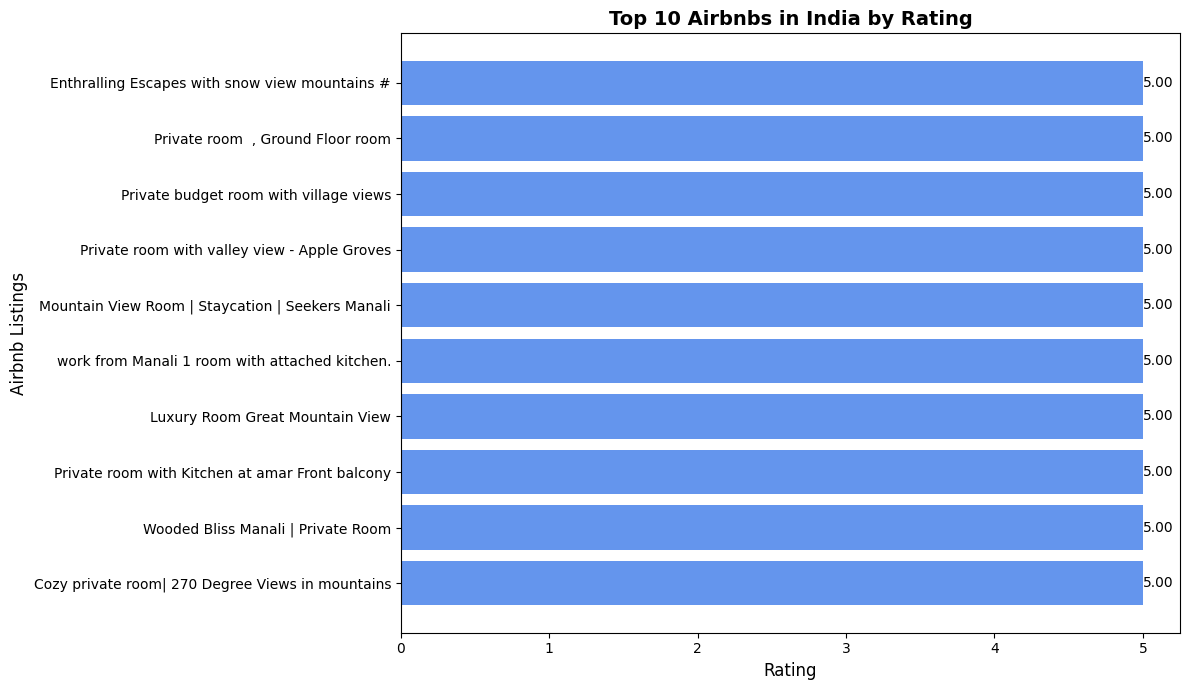

In [12]:
import matplotlib.pyplot as plt


data['rating'] = pd.to_numeric(data['rating'], errors='coerce').fillna(0)
top_10 = data.sort_values(by='rating', ascending=False).head(10)


plt.figure(figsize=(12,7))
bars = plt.barh(top_10['name'], top_10['rating'], color='cornflowerblue')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Airbnb Listings", fontsize=12)
plt.title("Top 10 Airbnbs in India by Rating", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()

#### 3.2) Finding top 10 based on Reviews

In [13]:
data['reviews'] = data['reviews'].astype('int')

data.sort_values(by='reviews', ascending=False).head(10).to_csv('top_10_airbnb_reviews.csv')

#### 3.3) Finding top 10 based on Reviews as well as Rating

In [14]:
data['rating_and_review_filter'] = data['rating'] * data['reviews']

data.sort_values(by = 'rating_and_review_filter', ascending = False).head(10).to_csv('top_10_airbnb_both.csv')

In [15]:
data['rating_and_review_filter'] = data['rating'] * data['reviews']
data.sort_values(by='rating_and_review_filter', ascending=False) .head(10) .to_csv('top_10_airbnbs_india.csv', index=False)